In [ ]:
!pip install chess

     |████████████████████████████████| 147 kB 4.1 MB/s 


In [22]:
import chess
import chess.engine
import chess.svg
import time
from IPython.display import SVG, display

## Evaluation

In [2]:
# Value of piece position
pawntable = [
    0, 0, 0, 0, 0, 0, 0, 0,
    5, 10, 10, -20, -20, 10, 10, 5,
    5, -5, -10, 0, 0, -10, -5, 5,
    0, 5, 10, 20, 20, 10, 5, 0,
    5, 5, 10, 25, 25, 10, 5, 5,
    10, 10, 20, 30, 30, 20, 10, 10,
    50, 50, 50, 50, 50, 50, 50, 50,
    90, 90, 90, 90, 90, 90, 90, 90]

knightstable = [
    -50, -40, -30, -30, -30, -30, -40, -50,
    -40, -20, 0, 5, 5, 0, -20, -40,
    -30, 5, 10, 15, 15, 10, 5, -30,
    -30, 0, 15, 20, 20, 15, 0, -30,
    -30, 5, 15, 20, 20, 15, 5, -30,
    -30, 0, 10, 15, 15, 10, 0, -30,
    -40, -20, 0, 0, 0, 0, -20, -40,
    -50, -40, -30, -30, -30, -30, -40, -50]

bishopstable = [
    -20, -10, -10, -10, -10, -10, -10, -20,
    -10, 10, 0, 0, 0, 0, 10, -10,                  
    -15, 10, 10, 10, 10, 10, 10, -15,
    -10, 0, 10, 10, 10, 10, 0, -10,
    -10, 5, 5, 10, 10, 5, 5, -10,
    -10, 0, 5, 10, 10, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -10, -10, -10, -10, -20]   # 5 ,5, -10, -10

rookstable = [
    0, 0, 0, 5, 5, 0, 0, 0,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 5, 5, 5, 5, 5, 5, -5,
    -5,5, 5, 5, 5, 5, 5, -5,
    -5, 5, 5, 5, 5, 5, 5, -5,
    -5, 5, 5, 5, 5, 5, 5, -5,
    5, 10, 10, 10, 10, 10, 10, 5,
    5, 5, 0, 0, 0, 0, 5, 5]

queenstable = [
    -20, -10, -10, -5, -5, -10, -10, -20,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -10, 5, 5, 5, 5, 5, 0, -10,
    0, 0, 5, 5, 5, 5, 0, -5,
    -5, 0, 5, 5, 5, 5, 0, -5,
    -10, 0, 5, 5, 5, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -5, -5, -10, -10, -20]

kingstable = [
    20, 30, 10, 0, 0, 10, 30, 20,
    20, 20, 0, 0, 0, 0, 20, 20,
    -10, -20, -20, -20, -20, -20, -20, -10,
    -20, -30, -30, -40, -40, -30, -30, -20,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30]

In [3]:

# Stockfish evaluation
def stockfish_eval(board_instance, depth):
    move = chess.engine.analyse(board, chess.engine.Limit(time=0.01))
    # print(move)
    return chess.engine.PovScore(move['score'], chess.BLACK).pov(chess.BLACK).relative.score()

# Self-defined static evaluation
def Static_Evaluation(current_board):
    i = 0
    evaluation = 0
    x = True
    try:
        x = bool(current_board.piece_at(i).holder)
    except AttributeError as e:
        x = x
    while i < 63: 
        evaluation = evaluation + (get_piece_val(str(current_board.piece_at(i))) if x else -get_piece_val(str(current_board.piece_at(i))))
    return evaluation

def get_piece_val(piece):
    if(piece == None):
        return 0
    value = 0
    if piece == "P" or piece == "p":
        value = 10
    if piece == "N" or piece == "n":
        value = 30
    if piece == "B" or piece == "b":
        value = 30
    if piece == "R" or piece == "r":
        value = 50
    if piece == "Q" or piece == "q":
        value = 90
    if piece == 'K' or piece == 'k':
        value = 900
    #value = value if (board.piece_at(place)).color else -value
    return value

# Minh's evalution case
def material_point(board):
    # Pawn difference = # of white pawns - # of black pawns
    pawn_diff = len(board.pieces(chess.PAWN, chess.WHITE)) - len(board.pieces(chess.PAWN, chess.BLACK))
    # Knight difference = # of white knight - # of black knight
    knight_diff = len(board.pieces(chess.KNIGHT, chess.WHITE)) - len(board.pieces(chess.KNIGHT, chess.BLACK))
    # Bishop difference = # of white bishop - # of black bishop
    bishop_diff = len(board.pieces(chess.BISHOP, chess.WHITE)) - len(board.pieces(chess.BISHOP, chess.BLACK))
    # Rook difference = # of white rook - # of black rook
    rook_diff = len(board.pieces(chess.ROOK, chess.WHITE)) - len(board.pieces(chess.ROOK, chess.BLACK))
    # Queen difference = # of white queen - # of black queen
    queen_diff = len(board.pieces(chess.QUEEN, chess.WHITE)) - len(board.pieces(chess.QUEEN, chess.BLACK))
    return 100*pawn_diff + 320*knight_diff + 330*bishop_diff + 500*rook_diff + 900*queen_diff

def position_point(board):
    # pawn_pos = pawn_white_point + pawn_black_point
    pawn_pos = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)]) + sum([-pawntable[chess.square_mirror(i)] for i in board.pieces(chess.PAWN, chess.BLACK)])
    # knight_pos = knight_white_point + knight_black_point
    knight_pos = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)]) + sum([-knightstable[chess.square_mirror(i)] for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    # bishop_pos = bishop_white_point + bishop_black_point
    bishop_pos = sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)]) + sum([-bishopstable[chess.square_mirror(i)] for i in board.pieces(chess.BISHOP, chess.BLACK)])
    # rook_pos = rook_white_point + rook_black_point
    rook_pos = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)]) + sum([-rookstable[chess.square_mirror(i)] for i in board.pieces(chess.ROOK, chess.BLACK)])
    # queen_pos = queen_white_point + queen_black_point
    queen_pos = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)]) + sum([-queenstable[chess.square_mirror(i)] for i in board.pieces(chess.QUEEN, chess.BLACK)])
    # king_pos = king_white_point + king_black_point
    king_pos = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)]) + sum([-kingstable[chess.square_mirror(i)] for i in board.pieces(chess.KING, chess.BLACK)])
    return pawn_pos + knight_pos + bishop_pos + rook_pos + queen_pos + king_pos

def evaluatePoint(board, depth):
    evaluate_point = material_point(board) + position_point(board)
    return evaluate_point


In [ ]:
def get_piece_val(piece):
    if(piece == None):
        return 0
    value = 0
    if piece == "P" or piece == "p":
        value = 10
    if piece == "N" or piece == "n":
        value = 30
    if piece == "B" or piece == "b":
        value = 30
    if piece == "R" or piece == "r":
        value = 50
    if piece == "Q" or piece == "q":
        value = 90
    if piece == 'K' or piece == 'k':
        value = 900
    #value = value if (board.piece_at(place)).color else -value
    return value

## Search algorithm

In [4]:
def is_favorable_move(board: chess.Board, move: chess.Move) -> bool:
    if move.promotion is not None:
        return True
    if board.is_capture(move) and not board.is_en_passant(move):
        if (get_piece_val(board.piece_type_at(move.from_square)) < get_piece_val(board.piece_type_at(move.to_square))) or (len(board.attackers(board.turn, move.to_square)) > len(board.attackers(not board.turn, move.to_square))):
            return True
    return False

### Alpha-beta pruning

In [11]:
# alpha-beta pruning algorithm based with deeper quiescence
def quiescence(current_board, max_depth, current_depth, isMax, alpha, beta, nodes_per_depth):
    # counting numnber of nodes for analysing
    if max_depth - current_depth in nodes_per_depth:
        nodes_per_depth[max_depth - current_depth] += 1
    else:
        nodes_per_depth[max_depth - current_depth] = 1
    
    # The stop case: king is captured or draw play once
    # case: check-mate
    if current_board.is_checkmate():
        if isMax:
          return -10000
        else:
          return 10000
    
    # case: draw once
    if current_board.is_stalemate():
        return 0

    # case: Terminal node: Game over
    if current_board.is_insufficient_material():
        return 0

    # case: find till the last children
    if current_depth == 0:
        return evaluatePoint(current_board, current_depth)

    # quiescence search for all move with depth n-2 -> n
    if max_depth - current_depth > 3:
        # take all possible move which considered is quies move
        all_possible_capture_move = [move for move in current_board.legal_moves if is_favorable_move(current_board, move)]
    else:
        # from these node find all possible case move (both quies and not qiues)
        all_possible_capture_move = current_board.legal_moves

    # Backtrack and find children
    if isMax:
        # set high negative
        best_score = -10000

        for legal_move in all_possible_capture_move:
            move = chess.Move.from_uci(str(legal_move))
            current_board.push(move)
            node_score = quiescence(current_board, max_depth, current_depth-1, False, alpha, beta, nodes_per_depth)
            best_score = max(best_score, node_score)
            current_board.pop()
            # calculate alpha for Max node
            alpha = max(alpha, best_score)
            # pruning
            if beta <= alpha:
                return best_score
        return best_score

    else:
        best_score = 10000

        for legal_move in all_possible_capture_move:
            move = chess.Move.from_uci(str(legal_move))
            current_board.push(move)
            node_score = quiescence(current_board, max_depth, current_depth-1, True, alpha, beta, nodes_per_depth)
            best_score = min(best_score, node_score)
            current_board.pop()
            # calculate beta for Min node
            beta = min(beta, best_score)
            # pruning
            if beta <= alpha:
              return best_score
        return best_score

## Find best move

In [12]:
def findBestMove(current_board, depth, isMax, alpha, beta):
  if current_board.is_checkmate():
    return chess.Move.null()

  best_move = chess.Move.null()
  nodes_per_depth = dict()

  start = time.time()
  if isMax:
    best_score = -10000
    for legal_move in current_board.legal_moves:
      move = chess.Move.from_uci(str(legal_move))
      current_board.push(move)
      move_score = quiescence(current_board, depth, depth, False, alpha, beta, nodes_per_depth)
      score = max(best_score, move_score)
      current_board.pop()
      if score > best_score:
        best_score = score
        best_move = move
    end = time.time()
    print("Time: {} s".format(end-start))
    return best_move
  else:
    best_score = 10000
    for legal_move in current_board.legal_moves:
      move = chess.Move.from_uci(str(legal_move))
      current_board.push(move)
      move_score = quiescence(current_board, depth, depth, True, alpha, beta, nodes_per_depth)
      score = min(best_score, move_score)
      current_board.pop()
      if score < best_score:
        best_score = score
        best_move = move
    end = time.time()
    print("Time: {} s".format(end - start))
    return best_move


## Machine - Machine

# BLACK is MAX, WHITE is MIN

In [13]:
def game_between_two_computer(depth=10):
    board = chess.Board()
    
    for n in range(0,40):
        start = time.time()
        if n%2 == 0:
            print("WHITE Turn")
            move = findBestMove(board, depth, False, -10000, 10000)
        else: 
            print("BLACK Turn")
            move = findBestMove(board, depth, True, -10000, 10000)
        end = time.time()
        
        print("Move in UCI format:", move)
        # print("Nodes per depth:", nodes_per_depth)
        print("Time taken by Move:", end-start)
        board.push(move)
        display(SVG(chess.svg.board(board, size=400)))  
        print("\n")

In [23]:
board = chess.Board()

## Chess Board Representation before best move¶

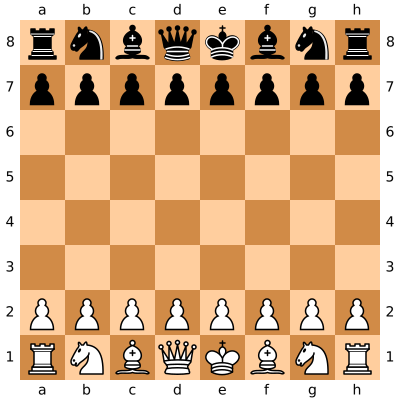

In [9]:
board

### WHITE move

In [14]:
move = findBestMove(board, 15, True, -10000, 10000)

Time: 3.3126070499420166 s


In [ ]:
move

Move.from_uci('h7f8')

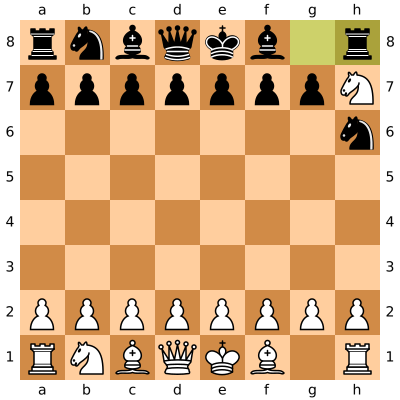

In [15]:
board.push(move)
board

Time: 8.102468729019165 s


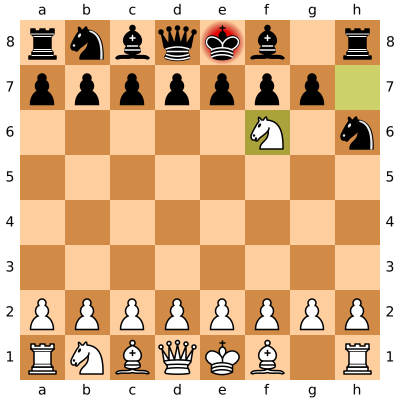

In [16]:
move = findBestMove(board, 15, True, -10000, 10000)
move
board.push(move)
board


WHITE Turn
Time: 5.174036741256714 s
Move in UCI format: g1h3
Time taken by Move: 5.177129745483398


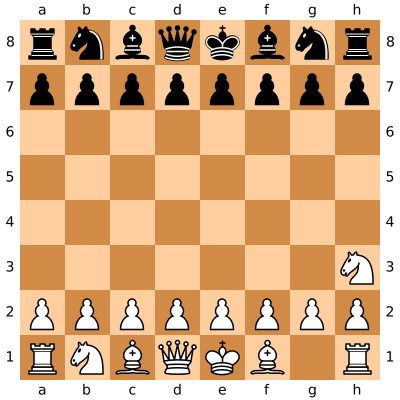



BLACK Turn
Time: 2.9979546070098877 s
Move in UCI format: g8h6
Time taken by Move: 2.998227119445801


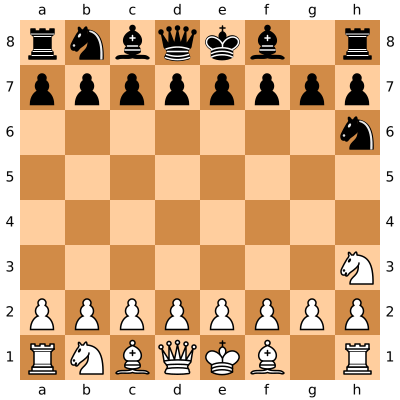



WHITE Turn
Time: 10.827423095703125 s
Move in UCI format: h3g5
Time taken by Move: 10.828287839889526


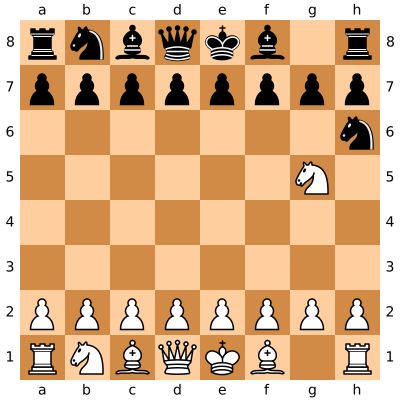



BLACK Turn
Time: 6.229507923126221 s
Move in UCI format: h8g8
Time taken by Move: 6.23012113571167


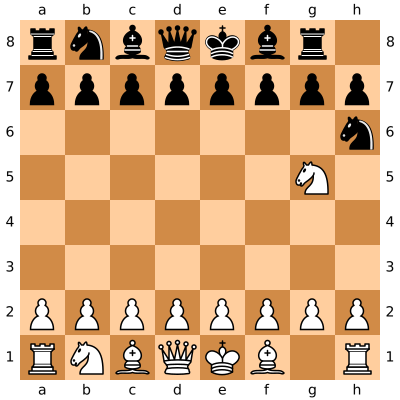



WHITE Turn
Time: 10.305273056030273 s
Move in UCI format: g5h7
Time taken by Move: 10.306113958358765


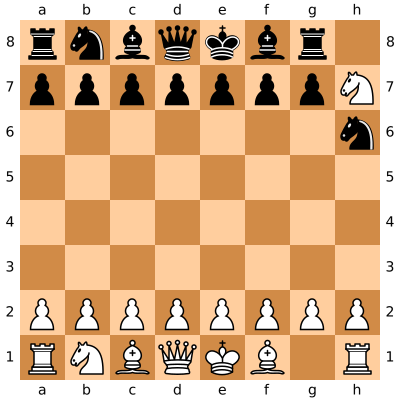



BLACK Turn
Time: 3.302741765975952 s
Move in UCI format: g8h8
Time taken by Move: 3.3038930892944336


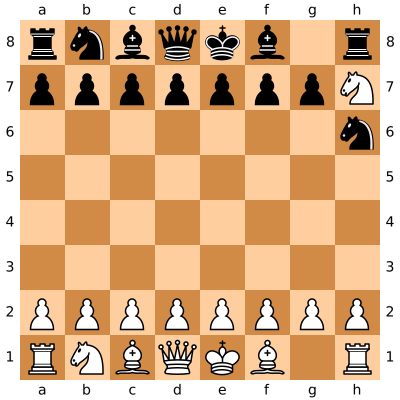



WHITE Turn
Time: 8.161689043045044 s
Move in UCI format: h7f6
Time taken by Move: 8.162652730941772


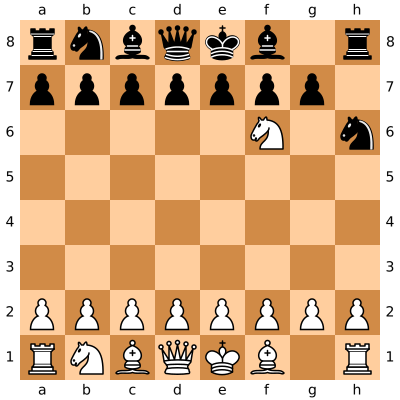



BLACK Turn
Time: 0.17541074752807617 s
Move in UCI format: g7f6
Time taken by Move: 0.17606306076049805


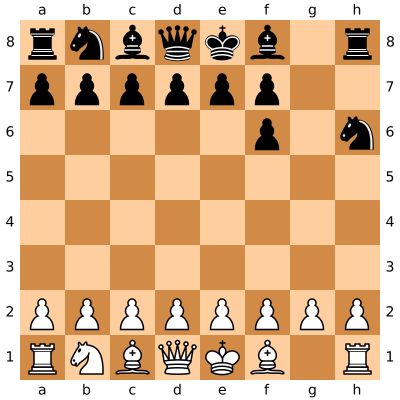



WHITE Turn
Time: 6.250566482543945 s
Move in UCI format: h1g1
Time taken by Move: 6.250787973403931


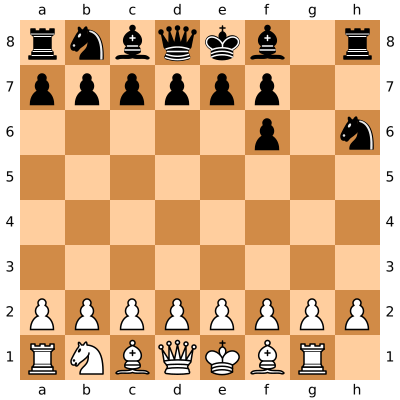



BLACK Turn
Time: 2.117888927459717 s
Move in UCI format: h8g8
Time taken by Move: 2.118140459060669


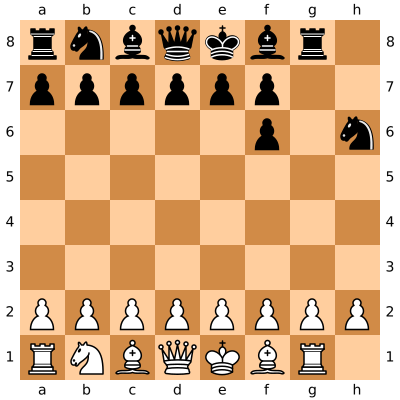



WHITE Turn
Time: 7.7294371128082275 s
Move in UCI format: g1h1
Time taken by Move: 7.730356931686401


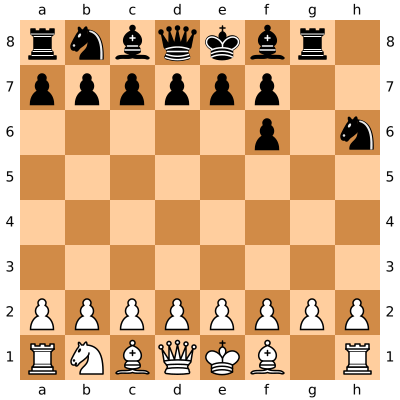



BLACK Turn
Time: 4.120445251464844 s
Move in UCI format: g8h8
Time taken by Move: 4.12152624130249


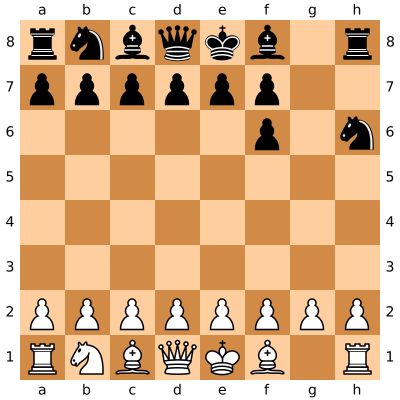



WHITE Turn
Time: 6.218841075897217 s
Move in UCI format: h1g1
Time taken by Move: 6.219836235046387


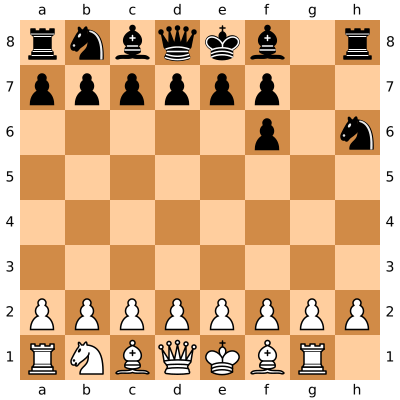



BLACK Turn
Time: 2.140104055404663 s
Move in UCI format: h8g8
Time taken by Move: 2.1410136222839355


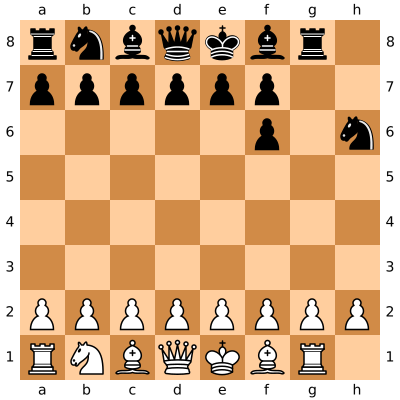



WHITE Turn
Time: 7.5830078125 s
Move in UCI format: g1h1
Time taken by Move: 7.583587408065796


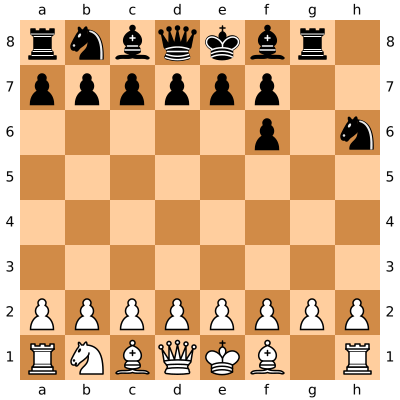



BLACK Turn
Time: 4.085258722305298 s
Move in UCI format: g8h8
Time taken by Move: 4.0855255126953125


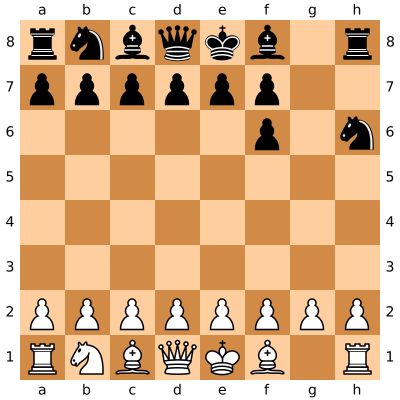



WHITE Turn
Time: 6.263096809387207 s
Move in UCI format: h1g1
Time taken by Move: 6.263356447219849


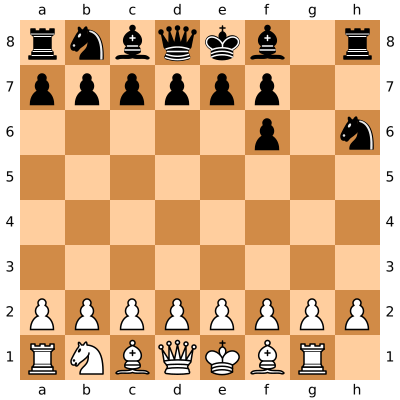



BLACK Turn
Time: 2.1718406677246094 s
Move in UCI format: h8g8
Time taken by Move: 2.172680616378784


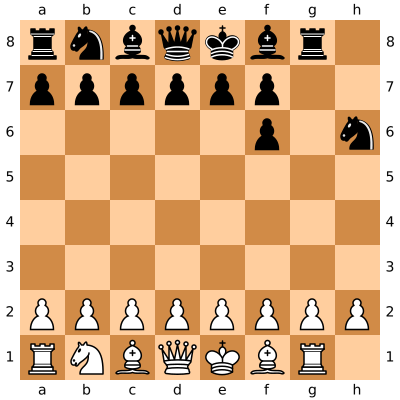



WHITE Turn
Time: 7.567108392715454 s
Move in UCI format: g1h1
Time taken by Move: 7.568389892578125


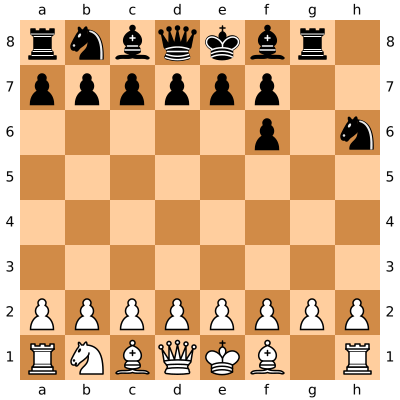



BLACK Turn
Time: 4.050185441970825 s
Move in UCI format: g8h8
Time taken by Move: 4.0514349937438965


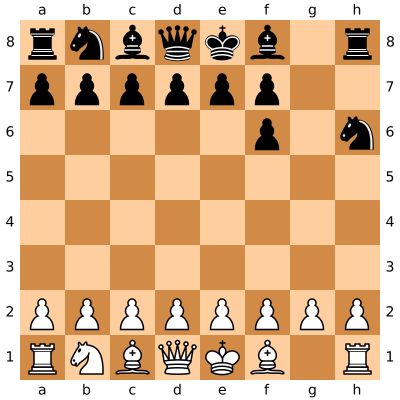



WHITE Turn
Time: 6.170974969863892 s
Move in UCI format: h1g1
Time taken by Move: 6.172128677368164


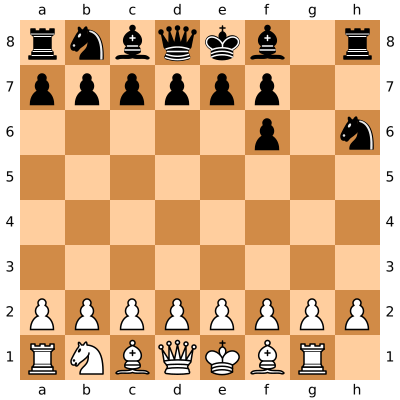



BLACK Turn
Time: 2.133650541305542 s
Move in UCI format: h8g8
Time taken by Move: 2.135084867477417


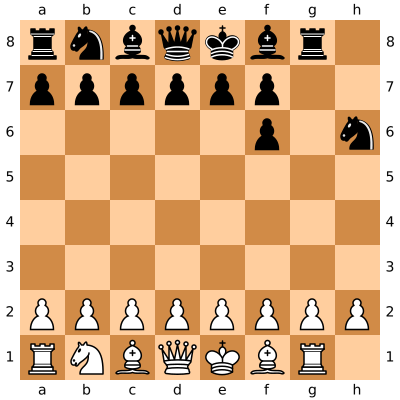



WHITE Turn
Time: 7.443588018417358 s
Move in UCI format: g1h1
Time taken by Move: 7.444542169570923


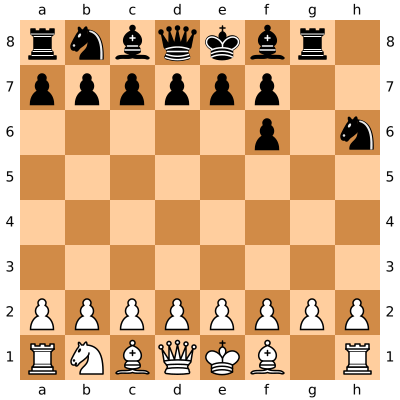



BLACK Turn
Time: 4.089722156524658 s
Move in UCI format: g8h8
Time taken by Move: 4.090250015258789


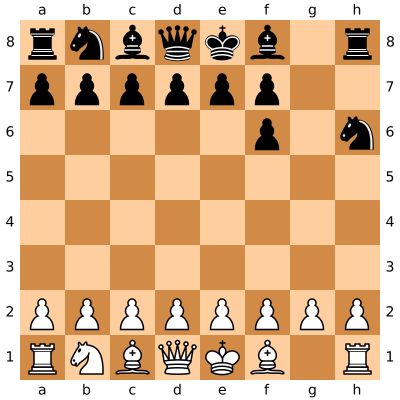



WHITE Turn
Time: 6.249624013900757 s
Move in UCI format: h1g1
Time taken by Move: 6.250529050827026


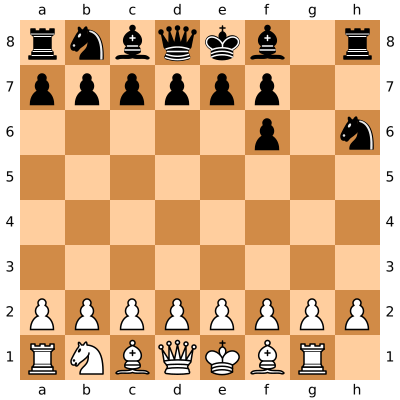



BLACK Turn
Time: 2.1710896492004395 s
Move in UCI format: h8g8
Time taken by Move: 2.1720306873321533


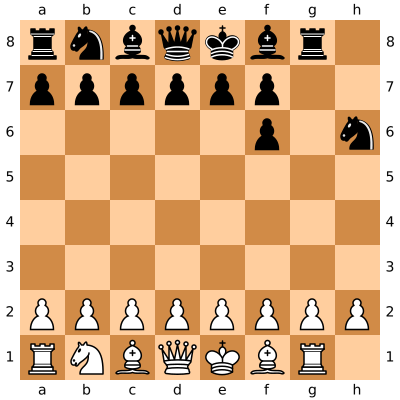



WHITE Turn
Time: 7.477618217468262 s
Move in UCI format: g1h1
Time taken by Move: 7.478721618652344


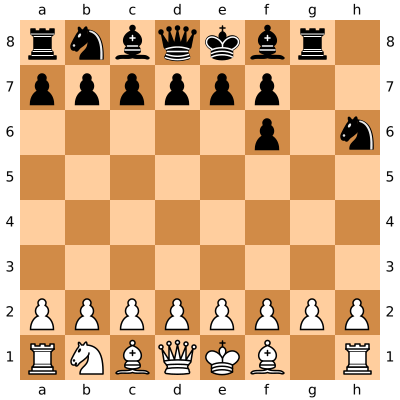



BLACK Turn
Time: 4.083946943283081 s
Move in UCI format: g8h8
Time taken by Move: 4.084514617919922


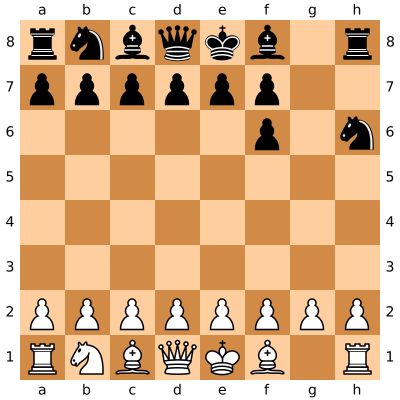



WHITE Turn
Time: 6.274657249450684 s
Move in UCI format: h1g1
Time taken by Move: 6.274927854537964


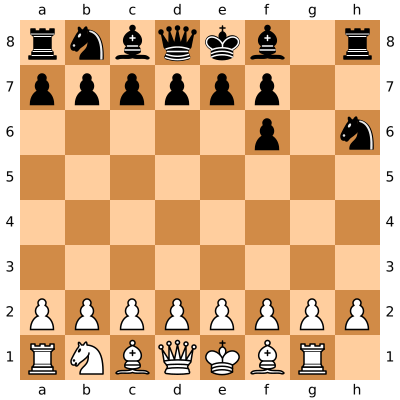



BLACK Turn
Time: 2.1622695922851562 s
Move in UCI format: h8g8
Time taken by Move: 2.162524700164795


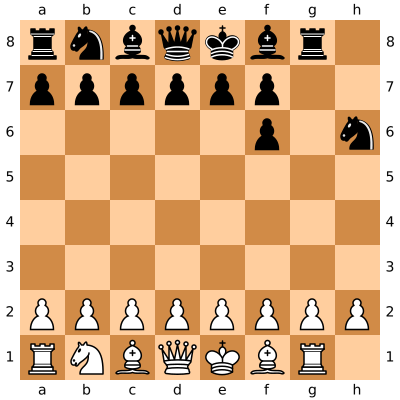



WHITE Turn
Time: 7.779673337936401 s
Move in UCI format: g1h1
Time taken by Move: 7.779906988143921


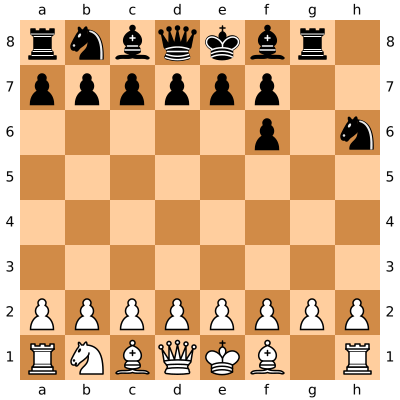



BLACK Turn
Time: 4.145978212356567 s
Move in UCI format: g8h8
Time taken by Move: 4.146548271179199


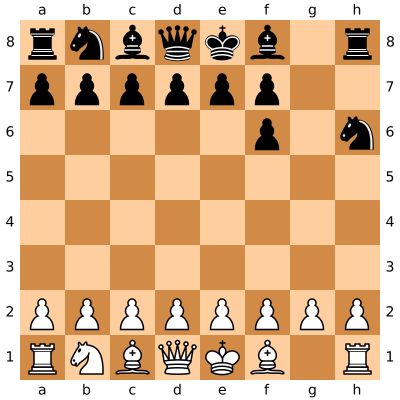



WHITE Turn
Time: 6.356541872024536 s
Move in UCI format: h1g1
Time taken by Move: 6.356771945953369


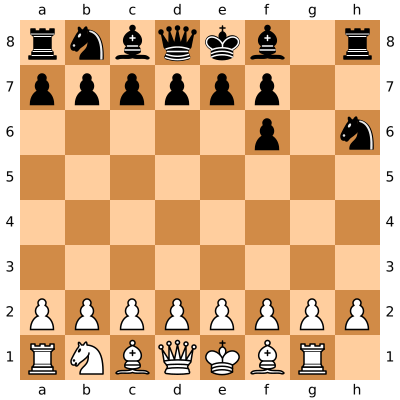



BLACK Turn
Time: 2.1840786933898926 s
Move in UCI format: h8g8
Time taken by Move: 2.184825897216797


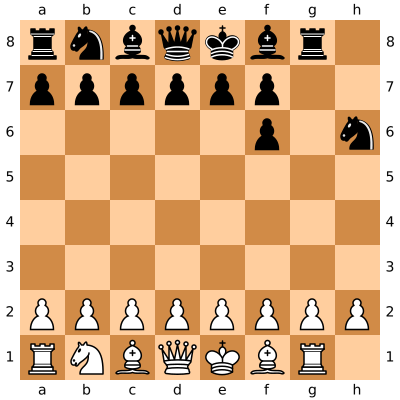



WHITE Turn
Time: 7.598237752914429 s
Move in UCI format: g1h1
Time taken by Move: 7.599164009094238


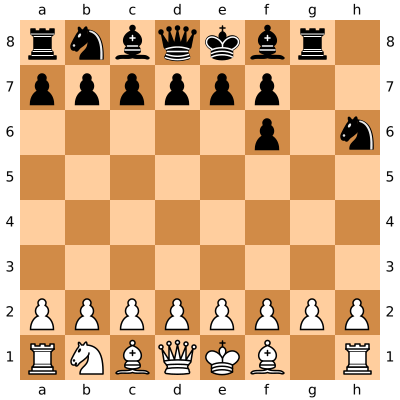



BLACK Turn
Time: 4.08272385597229 s
Move in UCI format: g8h8
Time taken by Move: 4.083960056304932


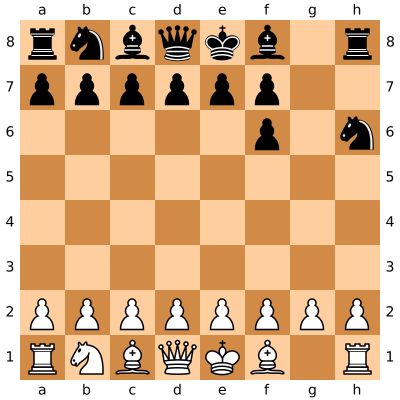



WHITE Turn
Time: 6.258905410766602 s
Move in UCI format: h1g1
Time taken by Move: 6.2594945430755615


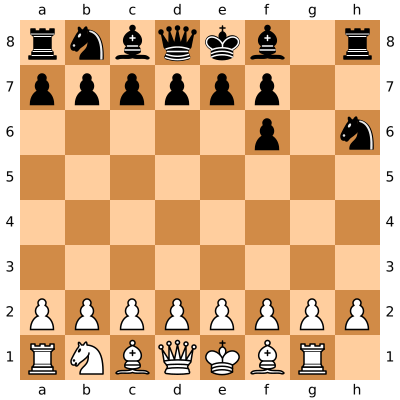



BLACK Turn
Time: 2.119830846786499 s
Move in UCI format: h8g8
Time taken by Move: 2.1201019287109375


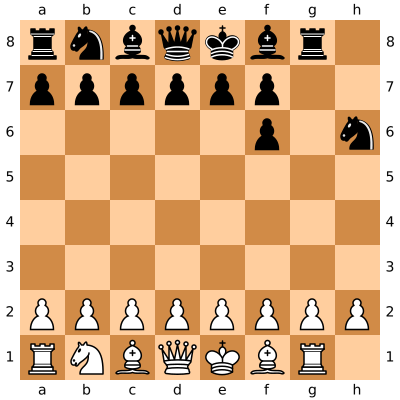



WHITE Turn
Time: 7.568432569503784 s
Move in UCI format: g1h1
Time taken by Move: 7.568682670593262


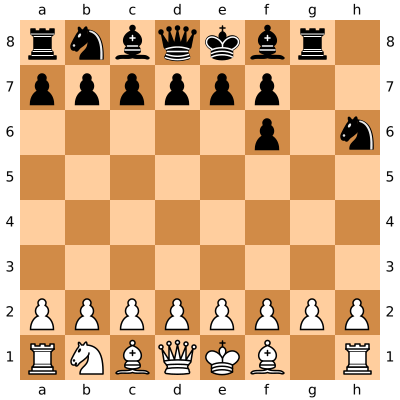



BLACK Turn
Time: 4.193095922470093 s
Move in UCI format: g8h8
Time taken by Move: 4.194046497344971


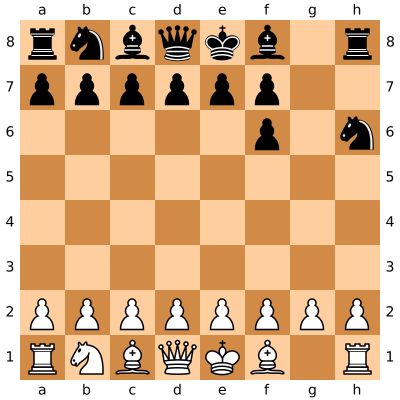

In [17]:
game_between_two_computer(15)

In [24]:
def game_between_two_computer(depth=5, moves_per_player=10):
    board = chess.Board()
    
    for n in range(0,moves_per_player*2):
        start = time.time()
        if n%2 == 0:
            print("WHITE Turn")
            move = findBestMove(board, depth, False, -10000, 10000)
        else:
            
            print("BLACK Turn")
            move = findBestMove(board, depth, True, -10000, 10000)
        end = time.time()
        
        print("Move in UCI format:", move)
        # print("Nodes per depth:", nodes_per_depth)
        print("Time taken by Move:", end-start)
        board.push(move)
        display(SVG(chess.svg.board(board, size=400)))  
        print("\n")

WHITE Turn
Time: 5.200538635253906 s
Move in UCI format: g1h3
Time taken by Move: 5.201657295227051


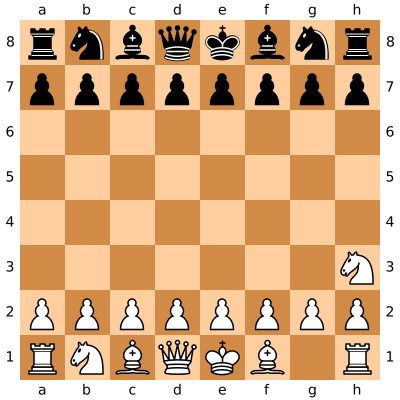



BLACK Turn
Time: 3.0787906646728516 s
Move in UCI format: g8h6
Time taken by Move: 3.0790328979492188


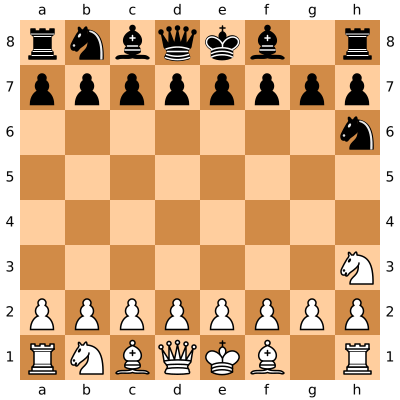



WHITE Turn
Time: 11.135417222976685 s
Move in UCI format: h3g5
Time taken by Move: 11.135709762573242


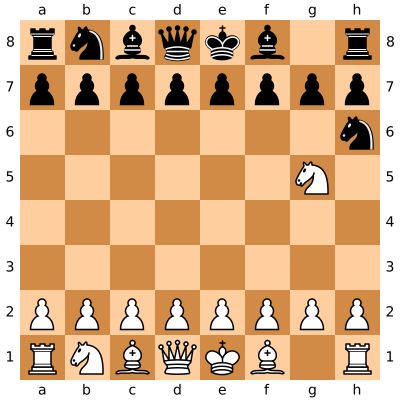



BLACK Turn
Time: 6.488692760467529 s
Move in UCI format: h8g8
Time taken by Move: 6.488930940628052


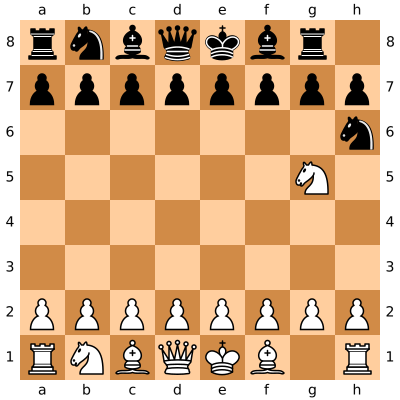



WHITE Turn
Time: 10.658609628677368 s
Move in UCI format: g5h7
Time taken by Move: 10.658844947814941


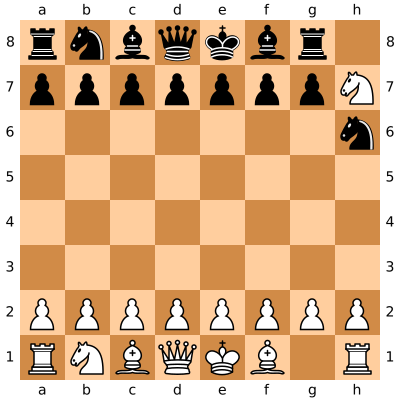



BLACK Turn
Time: 3.395853281021118 s
Move in UCI format: g8h8
Time taken by Move: 3.3961188793182373


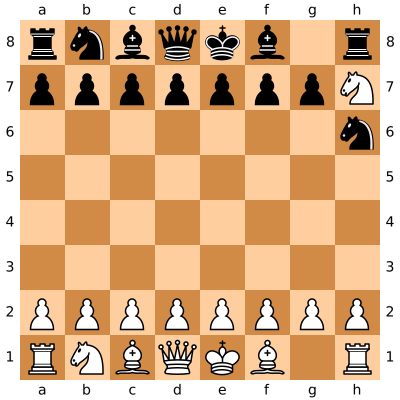



WHITE Turn
Time: 9.927103996276855 s
Move in UCI format: h7f6
Time taken by Move: 9.927988290786743


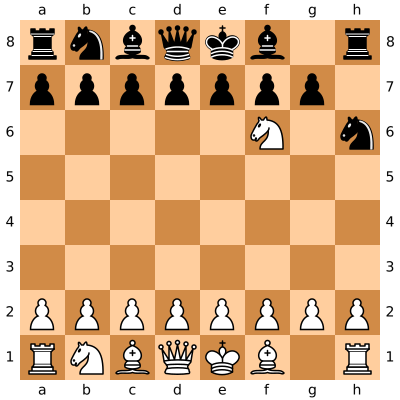



BLACK Turn
Time: 0.18499302864074707 s
Move in UCI format: g7f6
Time taken by Move: 0.18523478507995605


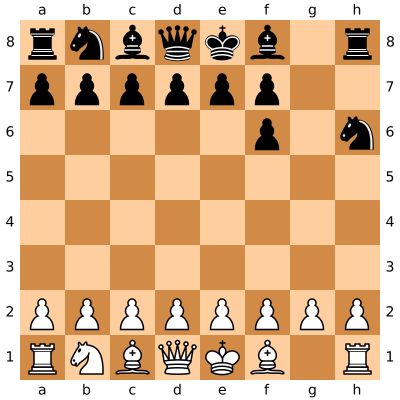



WHITE Turn
Time: 6.57503604888916 s
Move in UCI format: h1g1
Time taken by Move: 6.57523250579834


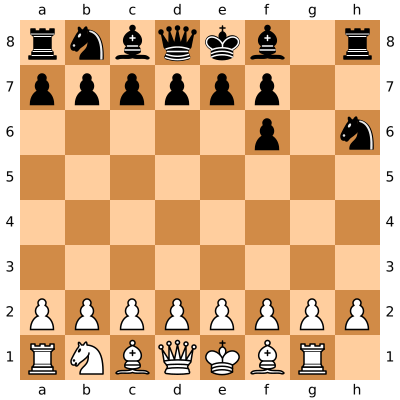



BLACK Turn
Time: 2.117231607437134 s
Move in UCI format: h8g8
Time taken by Move: 2.1174864768981934


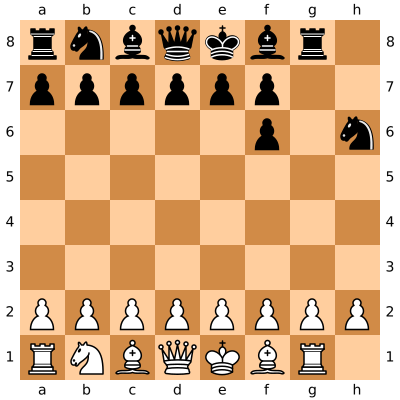



WHITE Turn
Time: 7.8493263721466064 s
Move in UCI format: g1h1
Time taken by Move: 7.850149154663086


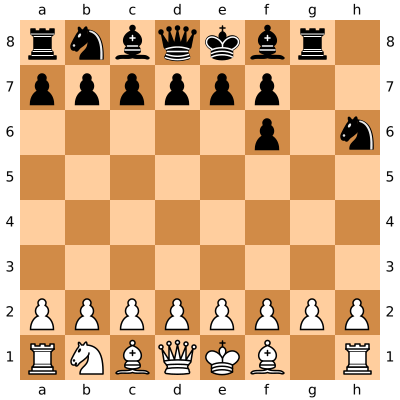



BLACK Turn
Time: 4.1569976806640625 s
Move in UCI format: g8h8
Time taken by Move: 4.157787799835205


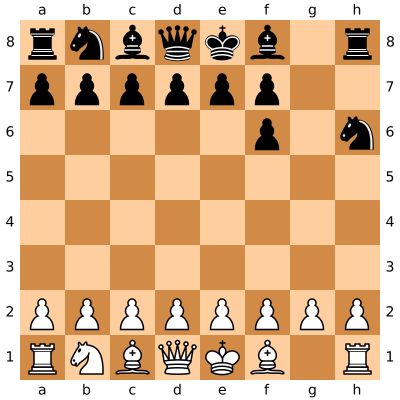



WHITE Turn
Time: 6.757546901702881 s
Move in UCI format: h1g1
Time taken by Move: 6.758611679077148


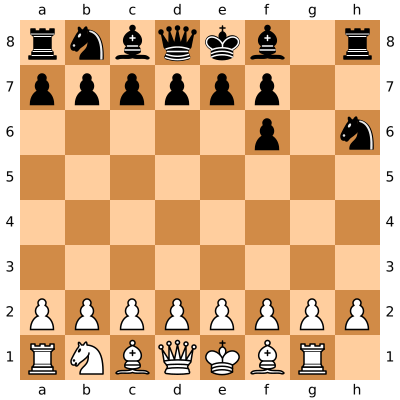



BLACK Turn
Time: 2.1775944232940674 s
Move in UCI format: h8g8
Time taken by Move: 2.178173065185547


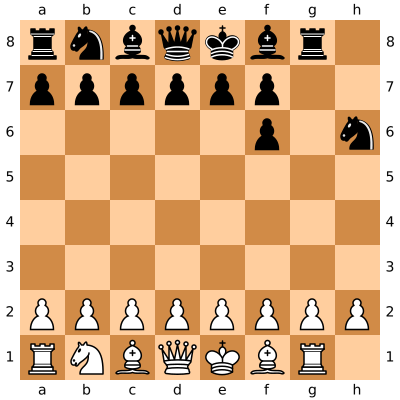



WHITE Turn
Time: 7.811704158782959 s
Move in UCI format: g1h1
Time taken by Move: 7.811939477920532


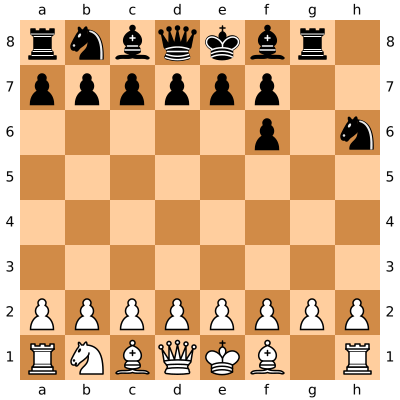



BLACK Turn
Time: 4.157494068145752 s
Move in UCI format: g8h8
Time taken by Move: 4.158377408981323


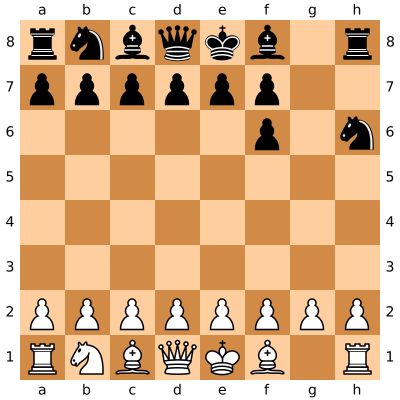



WHITE Turn
Time: 6.7014384269714355 s
Move in UCI format: h1g1
Time taken by Move: 6.701720476150513


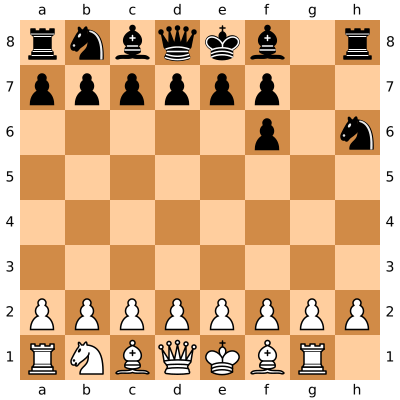



BLACK Turn
Time: 2.2257158756256104 s
Move in UCI format: h8g8
Time taken by Move: 2.2266197204589844


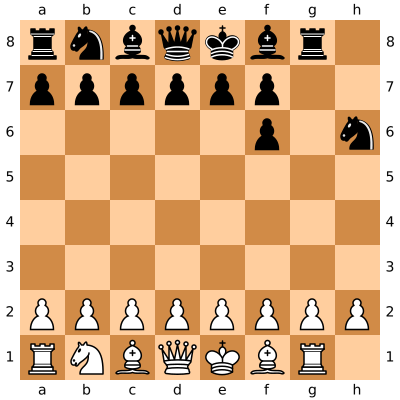



WHITE Turn
Time: 7.7673256397247314 s
Move in UCI format: g1h1
Time taken by Move: 7.767633438110352


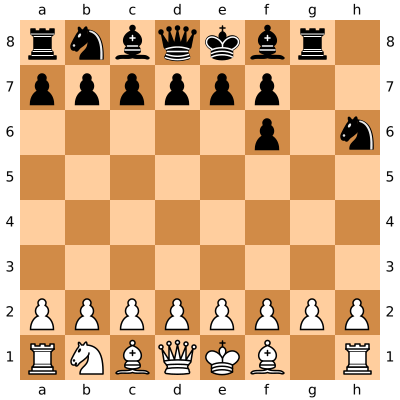



BLACK Turn
Time: 4.09294319152832 s
Move in UCI format: g8h8
Time taken by Move: 4.093191146850586


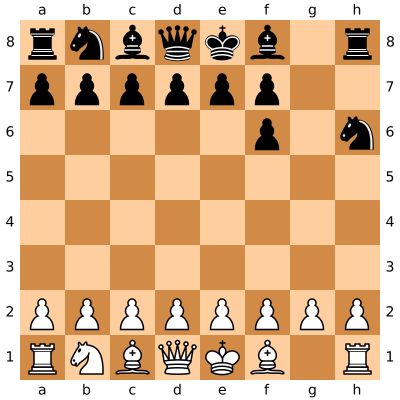

In [25]:
game_between_two_computer(depth=7, moves_per_player=10)